### Импортируем библиотеку Pandas и конвертор txt to csv

In [1]:
import pandas as pd
from data_to_csv import data_to_csv

## Перевод данных в удобный формат и сбор дополнительных данных

### Сохраняем датасеты в формат CSV

In [2]:
data_to_csv('data\\train\\pos', 'csv_data\\train_pos_binary')
data_to_csv('data\\train\\neg', 'csv_data\\train_neg_binary')
data_to_csv('data\\test\\pos', 'csv_data\\test_pos_binary')
data_to_csv('data\\test\\neg', 'csv_data\\test_neg_binary')
data_to_csv('data\\train\\pos', 'csv_data\\train_pos', False)
data_to_csv('data\\train\\neg', 'csv_data\\train_neg', False)
data_to_csv('data\\test\\pos', 'csv_data\\test_pos', False)
data_to_csv('data\\test\\neg', 'csv_data\\test_neg', False)

По теме IMBD rewies был найден дополнительный датасет, если он содержит данные отличные от изначальных, то это поможет увеличить обучающий датасет для моделей

https://www.kaggle.com/competitions/word2vec-nlp-tutorial/data?select=labeledTrainData.tsv.zip

Приведем его к общей форме и сохраним к остальным данным

In [ ]:
addit_data = pd.read_table('data\labeledTrainData.tsv\labeledTrainData.tsv')

In [ ]:
addit_data.head(2)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."


In [ ]:
addit_data = addit_data.drop(['id'], axis=1)
addit_data = addit_data.rename(columns={'sentiment': 'Sentiment', 'review': 'Review'}) 
addit_data.head(2)

,Sentiment,Review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."


In [ ]:
addit_data.to_csv('csv_data\\add_dataset.csv', index= False)

## Обьединение данных

Обьеденим позитивные и негативные отзывы, так как у нас уже имеется маркировка.
Так же обьеденим обучающие и тестовые данные, так как они соотносятся как 50 на 50, а это нецелесообразно.
В дальнейшем при обучении моделей из данных будут выделены обучающая и тестовая выборки в соотношении 75 на 25.

 Для бинарных данных:

In [ ]:
binary_train_pos = pd.read_csv('csv_data\\train_pos_binary.csv')
binary_train_neg = pd.read_csv('csv_data\\train_neg_binary.csv')
binary_test_pos = pd.read_csv('csv_data\\test_pos_binary.csv')
binary_test_neg = pd.read_csv('csv_data\\test_neg_binary.csv')
frames = [binary_train_pos, binary_train_neg, binary_test_pos, binary_test_neg]
binary_dataset = pd.concat(frames, ignore_index=True)

In [ ]:
binary_dataset = binary_dataset.drop_duplicates()

In [ ]:
binary_dataset.head()

,Review,Sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [ ]:
binary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49569 entries, 0 to 49986
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     49569 non-null  object
 1   Sentiment  49569 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


Для бинарных данных с добавлением дополнительных данных:

In [ ]:
add_dataset = pd.read_csv('csv_data\\add_dataset.csv')
frames = [binary_dataset, add_dataset]
big_binary_dataset = pd.concat(frames, ignore_index=True)

In [ ]:
big_binary_dataset = big_binary_dataset.drop_duplicates()

In [ ]:
big_binary_dataset.head()

,Review,Sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [ ]:
big_binary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62142 entries, 0 to 74568
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     62142 non-null  object
 1   Sentiment  62142 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


Для данных с оценкой от 1 до 10:

In [ ]:
train_pos = pd.read_csv('csv_data\\train_pos.csv')
train_neg = pd.read_csv('csv_data\\train_neg.csv')
test_pos = pd.read_csv('csv_data\\test_pos.csv')
test_neg = pd.read_csv('csv_data\\test_neg.csv')
frames = [train_pos, train_neg, test_pos, test_neg]
dataset = pd.concat(frames, ignore_index=True)

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset.head()

,Review,Sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,9.0
1,Homelessness (or Houselessness as George Carli...,8.0
2,Brilliant over-acting by Lesley Ann Warren. Be...,10.0
3,This is easily the most underrated film inn th...,7.0
4,This is not the typical Mel Brooks film. It wa...,8.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49573 entries, 0 to 49986
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Review     49573 non-null  object 
 1   Sentiment  49573 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.1+ MB


## Изучение и обработка данных

In [7]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns

### Данные с оценкой от 1 до 10:

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

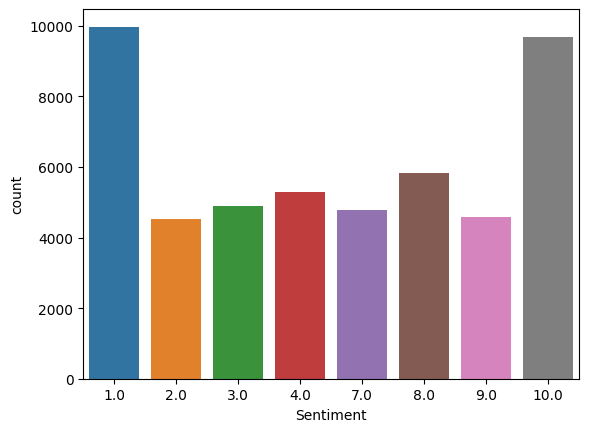

In [ ]:
sns.countplot(x=dataset["Sentiment"])

Очевидно, что данные по оценкам распределены неравномерно. Очень много единиц и десяток, но что важнее, в данных отсутствуют отзывы с оценкой 5 и 6 (об этом предупреждают и составители датасета).

### Бинарные данные

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

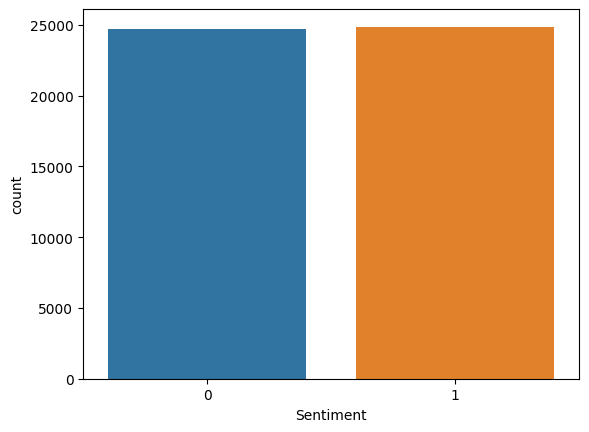

In [ ]:
sns.countplot(x=binary_dataset["Sentiment"])

Данные распределены равномерно

#### Облако слов для позитвных и негативных

Негативные:

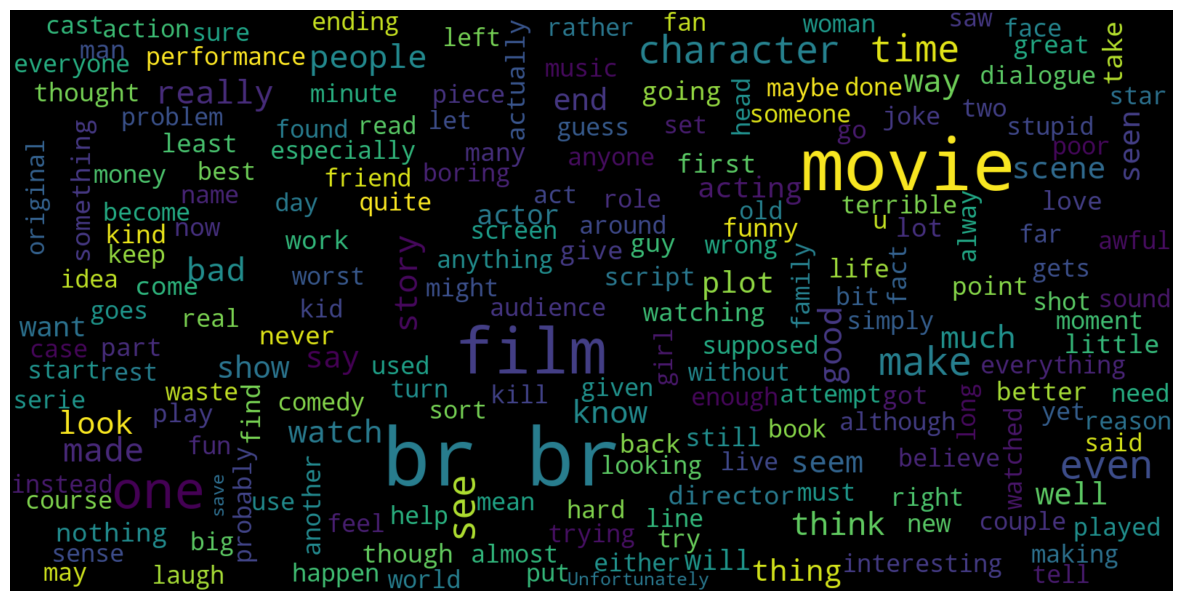

In [ ]:
consolidated=' '.join(word for word in binary_dataset['Review'][binary_dataset['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

Позитивные:

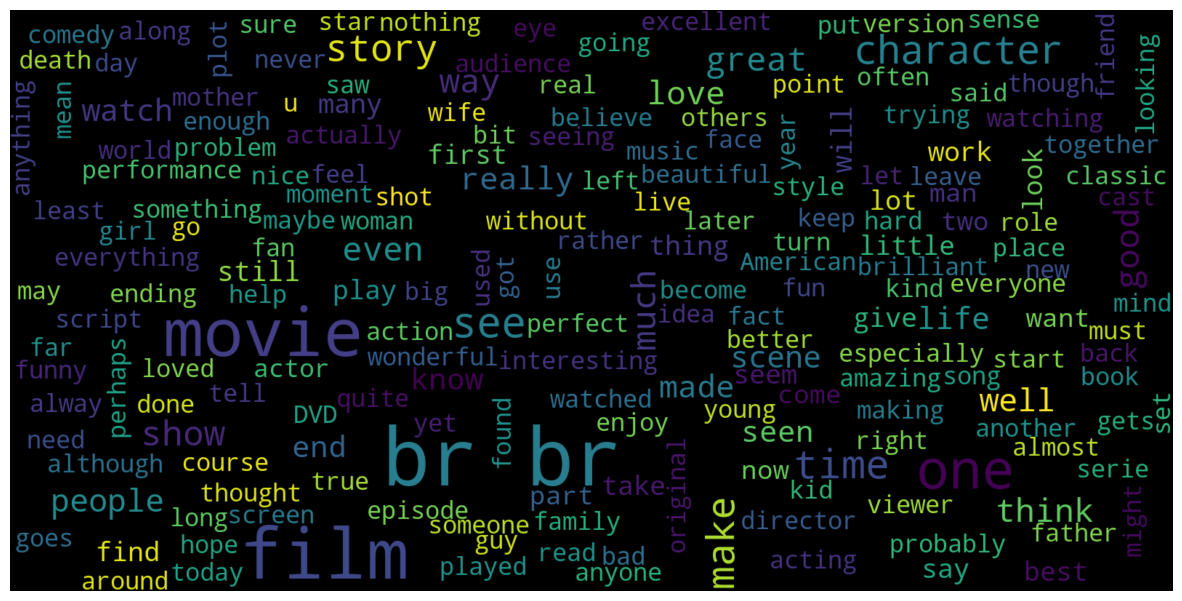

In [ ]:
consolidated=' '.join(word for word in binary_dataset['Review'][binary_dataset['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

Произвдем очистку данных от слов связок, лишних символов, переносов строки. Извлечем начальные формы слов.

#### Очистка данных и новые облака слов

In [2]:
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [3]:
lemmatizer = WordNetLemmatizer()
stp_words = stopwords.words('english')
def clean(text):
  text = re.sub(r'[^\w\s]','',text, re.UNICODE)
  text = text.replace('''<br /><br />''', '')
  text = text.replace('''<br>''', '')
  text = text.lower()
  text = [lemmatizer.lemmatize(token, "n") for token in text.split(" ")]
  text = [lemmatizer.lemmatize(token, "v") for token in text]
  text =" ".join(word for word in text if word not in stp_words)
  return text

In [ ]:
binary_dataset['Review'] = binary_dataset['Review'].apply(clean)

Негативные:

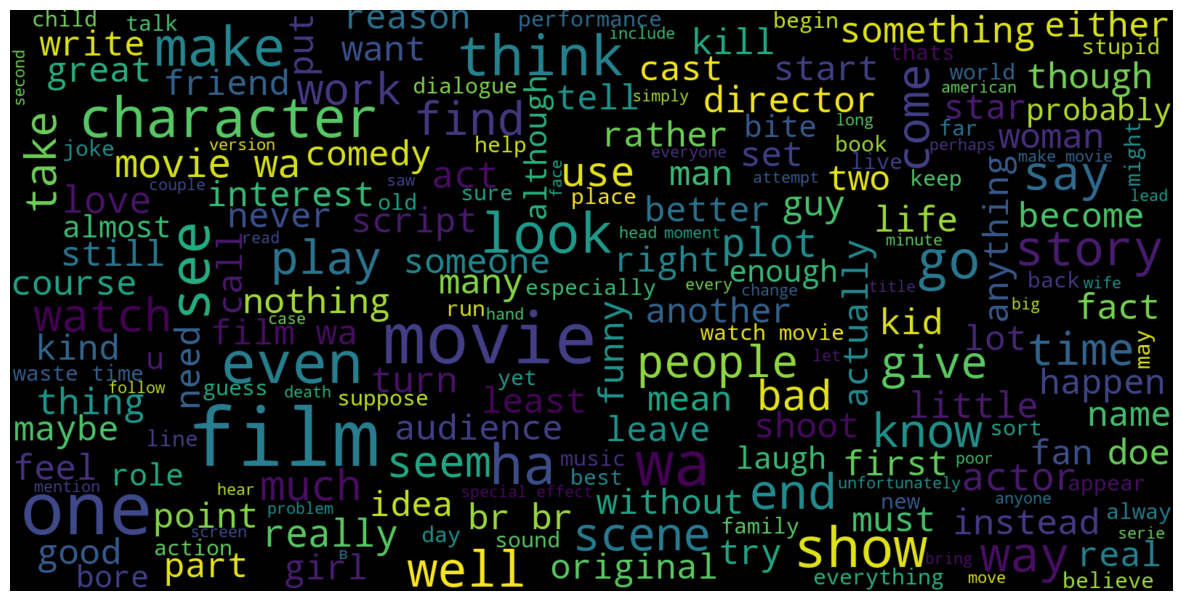

In [ ]:
consolidated=' '.join(word for word in binary_dataset['Review'][binary_dataset['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

Позитивные:

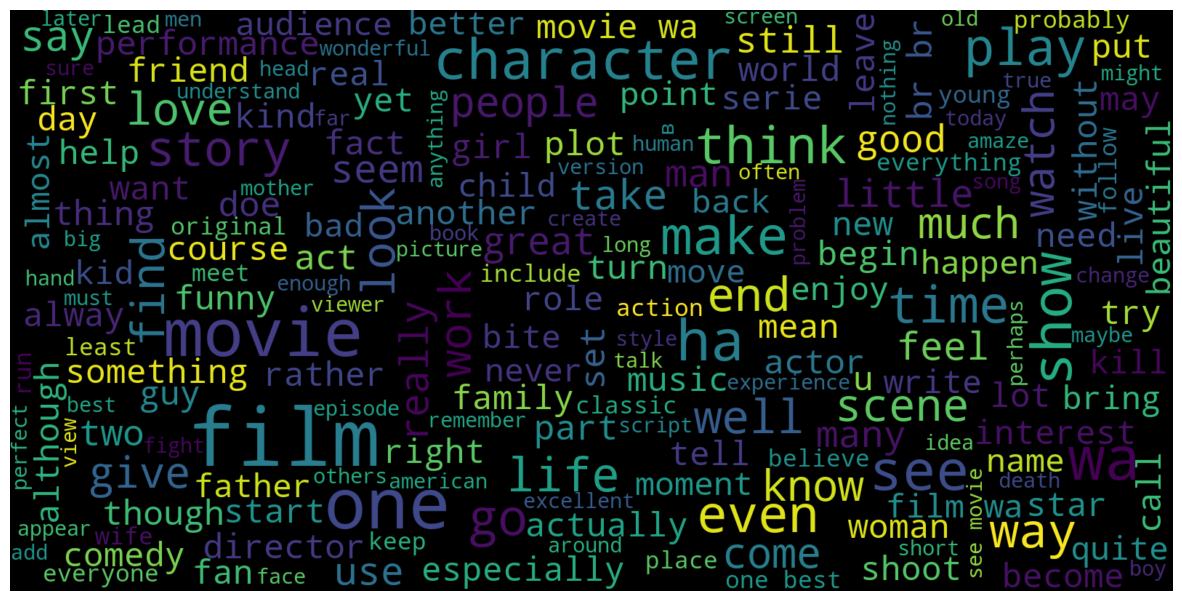

In [ ]:
consolidated=' '.join(word for word in binary_dataset['Review'][binary_dataset['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

### Бинарные данные с добавлением дополнительных данных

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

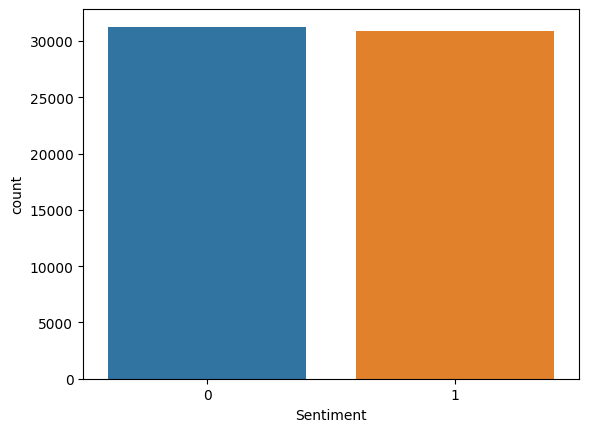

In [ ]:
sns.countplot(x=big_binary_dataset["Sentiment"])

Данные распределены равномерно

#### Очистка данных и облака слов

In [4]:
big_binary_dataset = pd.read_csv('csv_data\\big_binary_dataset.csv')

In [5]:
big_binary_dataset['Review'] = big_binary_dataset['Review'].apply(clean)

Негативные:

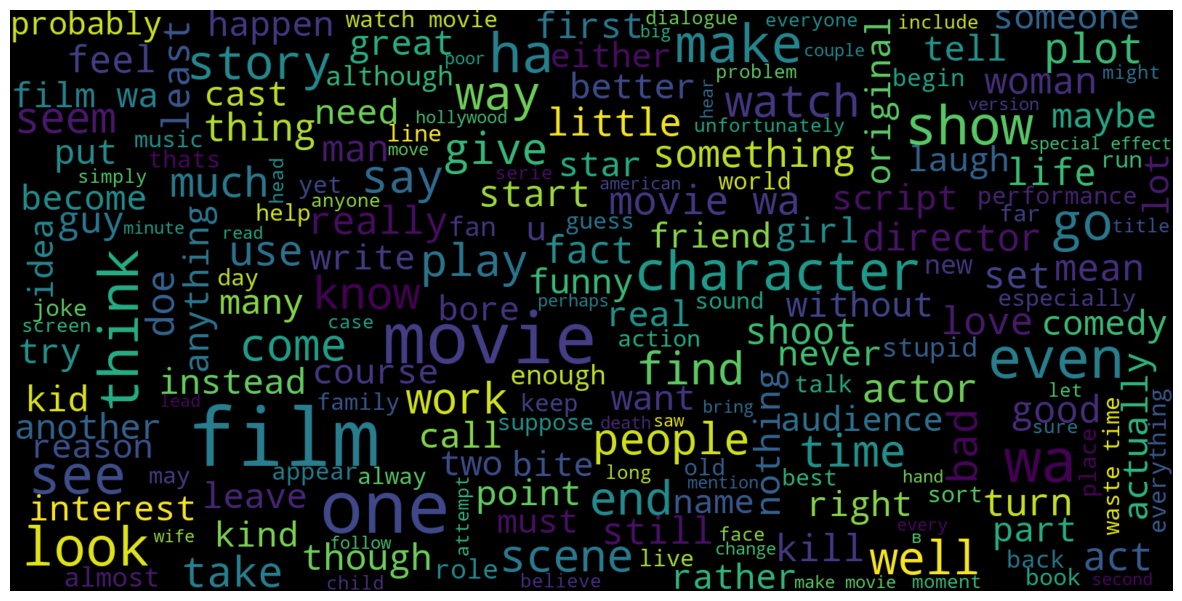

In [8]:
consolidated=' '.join(word for word in big_binary_dataset['Review'][big_binary_dataset['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

Позитивные:

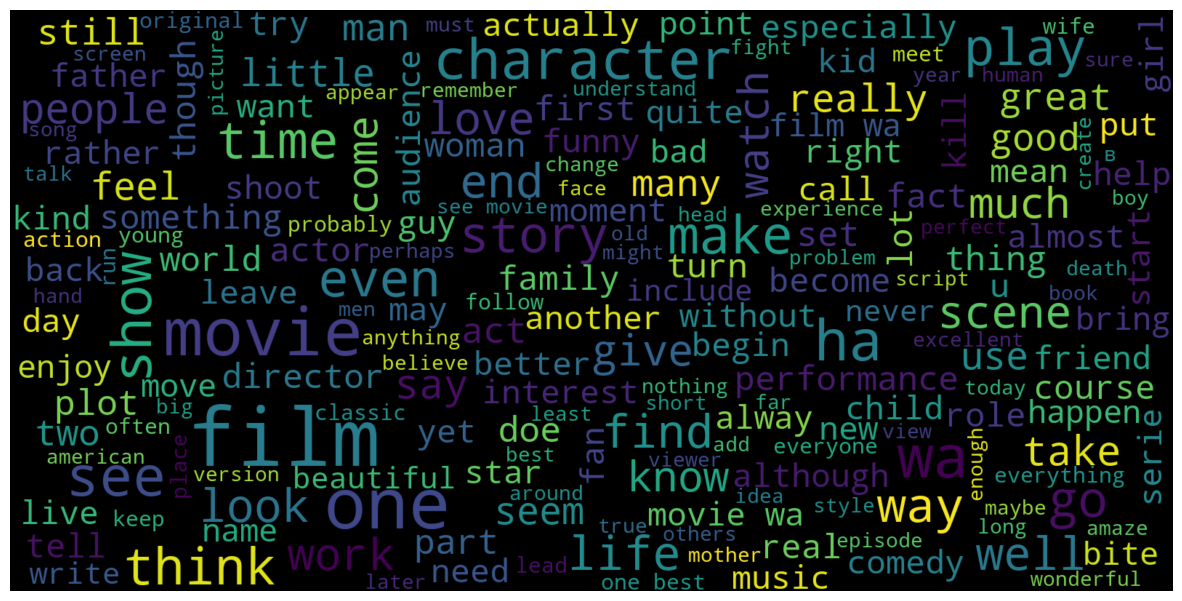

In [9]:
consolidated=' '.join(word for word in big_binary_dataset['Review'][big_binary_dataset['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
big_binary_dataset.to_csv('csv_data\\cleaned_dataset.csv', index= False)

Эмоциональная окраска текстов

In [10]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
%matplotlib inline

In [11]:
def sentiment(text):
    testimonial = TextBlob(text)
    return testimonial.sentiment.polarity

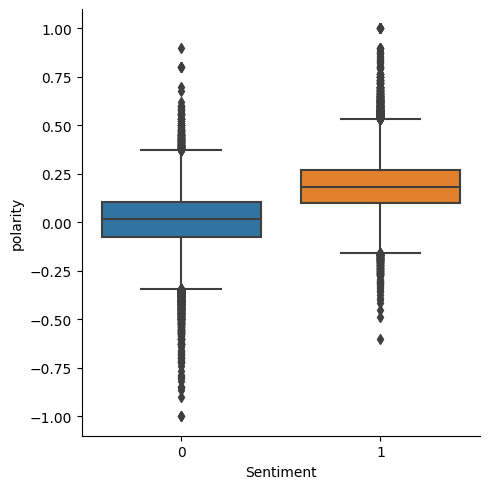

In [13]:
data = pd.read_csv('csv_data\\cleaned_dataset.csv')
data['polarity'] = data['Review'].apply(sentiment)
sns.catplot(data=data, x="Sentiment", y="polarity", kind="box")

## Сохраняем очищенные данные